# Deep CNN and geometric features-based diseases detection and classification


In this research, a new technique is applied based on the fusion of deep convolutional (CNN) and geometric features.

### Part 1

- Initially, disease regions are extracted from given WCE images using a new approach named contrast-enhanced colour features.

- Geometric features are extracted from segmented disease region.

### Part 2

- Thereafter, unique VGG16 and VGG19 deep CNN features fusion are performed based on Euclidean Fisher Vector.

- The unique features are fused with geometric features which are later fed to conditional entropy approach for best features selection. The selected features are finally classified by K-Nearest Neighbour.

- a new technique is applied based on the fusion of deep convolutional (CNN) and geometric features.


In [68]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# import matplotlib.image as mpimg
from scipy.ndimage import median_filter

from os import listdir
from random import choice

### Settings:


In [66]:
random_img = True
dataset_path = "Resource/DataSet/"
default_img_path = "Resource/DataSet/NBI_3.png"
img_path = (
    dataset_path + choice(listdir(dataset_path)) if random_img else default_img_path
)


kernal_size = (3, 3)


Structuring_element_shape = {
    "MORPH_RECT": cv.MORPH_RECT,
    "MORPH_ELLIPSE": cv.MORPH_ELLIPSE,
    "MORPH_CROSS": cv.MORPH_CROSS,
}



kernel = np.ones(kernal_size, np.uint8)


Structuring_element = cv.getStructuringElement(
    Structuring_element_shape["MORPH_RECT"], kernal_size
)

In [56]:
print(img_path)

Resource/DataSet/WL_2.png


In [57]:
# Rectangular Kernel
# cv.getStructuringElement(cv.MORPH_RECT, kernal_size)
# array([[1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1]], dtype=uint8)

# Elliptical Kernel
# cv.getStructuringElement(cv.MORPH_ELLIPSE, kernal_size)
# array([[0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0]], dtype=uint8)

# Cross-shaped Kernel
# cv.getStructuringElement(cv.MORPH_CROSS, kernal_size)
# array([[0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0],
#        [1, 1, 1, 1, 1],
#        [0, 0, 1, 0, 0],
#        [0, 0, 1, 0, 0]], dtype=uint8)

### Image selection:


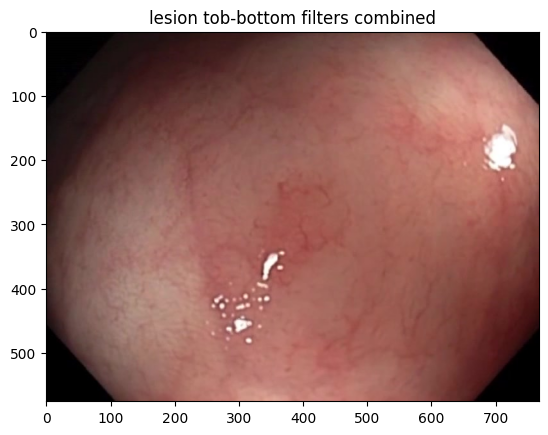

In [58]:
# Reading Image
lesion_img = cv.imread(img_path)
lesion_img_bgr = lesion_img.copy()

# Converting color to RGB since OpenCv use BGR, and matplotlib uses RGB
lesion_img = cv.cvtColor(lesion_img, cv.COLOR_BGR2RGB)

# Display the image
plt.imshow(lesion_img)
plt.title("lesion tob-bottom filters combined")
plt.show()

# Contrast-enhanced colour features (CHCF)

### Contrast elongating

Contrast elongating is performed to increase lesion contrast in the given image. It is one of the very
first steps in image processing to improve the contrast of given image. The input image is invented
and the resultant image is more suitable as related to the original image.

In contrast stretching phase, top-hat and bottom-hat filters are performed. The top-hat filter
improves the contrast of foreground regions whereas bottom-hat filter controls the background
contrast.

- Top Hat: It is the difference between input image and Opening of the image.
- Black Hat: It is the difference between the closing of the input image and input image.


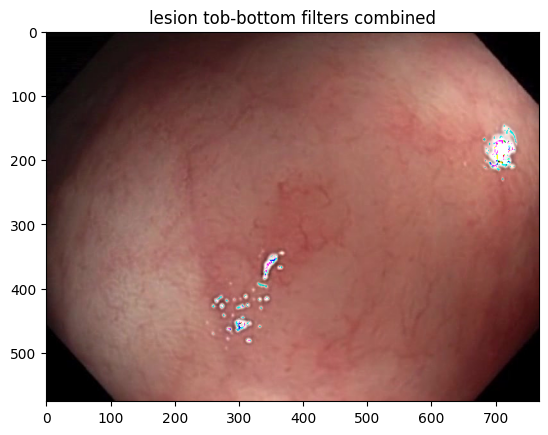

In [69]:
# The top-hat transform is an operation that extracts small elements and details from given images.
tophat_img = cv.morphologyEx(lesion_img, cv.MORPH_TOPHAT, kernel)
blackhat_img = cv.morphologyEx(tophat_img, cv.MORPH_BLACKHAT, kernel)

# image addition
# alpha = beta = 0.5
# comb_img = cv.addWeighted(lesion_img, alpha, tophat_img, beta, 0)
# comb_img = cv.addWeighted(comb_img, alpha, blackhat_img, beta, 0)
#
# comb_img = lesion_img + tophat_img
# comb_img = comb_img + blackhat_img
#
comb_img = np.add(lesion_img, tophat_img)
comb_img = np.add(comb_img, blackhat_img)

# Display the img
plt.imshow(comb_img)
plt.title("lesion tob-bottom filters combined")
plt.show()

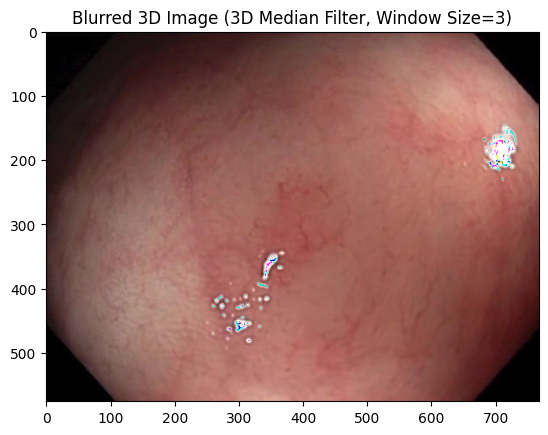

In [78]:
# Apply 3D median filter
image_shape = comb_img.shape  # get the image shape
window_size = 3  # Adjust this parameter based on the desired level of blurring
blurred_image = median_filter(comb_img, size=(window_size, window_size, window_size))

# Display the img
plt.imshow(comb_img)
plt.title(f"Blurred 3D Image (3D Median Filter, Window Size={window_size})")
plt.show()

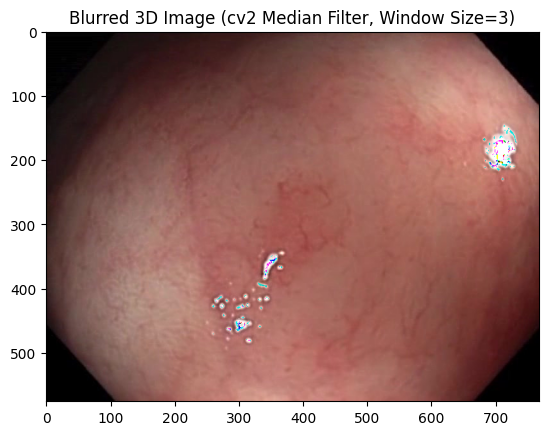

In [79]:
# Apply 3D median filter using cv2 (by applying 2D median filter to each slice)
image_shape = comb_img.shape  # get the image shape
window_size = 3  # Adjust this parameter based on the desired level of blurring
blurred_image = np.zeros_like(comb_img)

for i in range(image_shape[2]):
    blurred_image[:, :, i] = cv.medianBlur(
        comb_img[:, :, i].astype(np.uint8), ksize=window_size
    )

# Display the img
plt.imshow(comb_img)
plt.title(f"Blurred 3D Image (cv2 Median Filter, Window Size={window_size})")
plt.show()